In [ ]:
!pip install konlpy
!apt-get update -qq
!apt-get install -y fonts-nanum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 18.4 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 47 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,879 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking f

In [ ]:

import re                                                          # For text cleaning
import pandas as pd                                                # For handling data in table format
import matplotlib.pyplot as plt                                    # For visualizing data
import seaborn as sns                                              # For prettier visualizations
from collections import Counter                                    # For counting words
from wordcloud import WordCloud                                    # For word cloud visualization
from nltk.tokenize import word_tokenize, sent_tokenize             # For English tokenizing
from konlpy.tag import Okt                                         # Korean NLP library for tokenizing



In [ ]:
from google.colab import files
import os
import shutil

# Uploading Korean subtitles folder
print("Please upload the Korean subtitle folder.")
uploaded_ko = files.upload()

# Uploading English subtitles folder
print("Please upload the English subtitle folder.")
uploaded_en = files.upload()

# Moving files to proper folders
ko_folder = 'Squid Game Korean Subtitles'
en_folder = 'Squid Game English Subtitles'

os.makedirs(ko_folder, exist_ok=True)
os.makedirs(en_folder, exist_ok=True)

# Moving Korean subtitles to the folder
for filename in uploaded_ko:
    shutil.move(filename, os.path.join(ko_folder, filename))

# Moving English subtitles to the folder
for filename in uploaded_en:
    shutil.move(filename, os.path.join(en_folder, filename))

print("Subtitle files uploaded successfully!")

Please upload the Korean subtitle folder.


Saving ep1_ko.txt to ep1_ko.txt
Saving ep2_ko.txt to ep2_ko.txt
Saving ep3_ko.txt to ep3_ko.txt
Saving ep4_ko.txt to ep4_ko.txt
Saving ep5_ko.txt to ep5_ko.txt
Saving ep6_ko.txt to ep6_ko.txt
Saving ep7_ko.txt to ep7_ko.txt
Saving ep8_ko.txt to ep8_ko.txt
Saving ep9_ko.txt to ep9_ko.txt
Please upload the English subtitle folder.


Saving ep1_en.txt to ep1_en.txt
Saving ep2_en.txt to ep2_en.txt
Saving ep3_en.txt to ep3_en.txt
Saving ep4_en.txt to ep4_en.txt
Saving ep5_en.txt to ep5_en.txt
Saving ep6_en.txt to ep6_en.txt
Saving ep7_en.txt to ep7_en.txt
Saving ep8_en.txt to ep8_en.txt
Saving ep9_en.txt to ep9_en.txt
Subtitle files uploaded successfully!


In [ ]:
import os
import re

# Folder paths for Korean and English subtitle files
ko_folder = 'Squid Game Korean Subtitles'
en_folder = 'Squid Game English Subtitles'

# Function to clean subtitles (removes formatting and non-dialogue lines)
def clean_subtitles(lines):
    cleaned_lines = []
    for line in lines:
        line = line.strip()
        line = re.sub(r'{\\.*?}', '', line)
        line = re.sub(r'</?i>', '', line)
        line = re.sub(r'<.*?>', '', line)
        if line and not re.match(r'^\d+$', line) and not re.match(r'^\d{2}:\d{2}:\d{2}', line):
            cleaned_lines.append(line)
    return cleaned_lines

# Function to load, clean, and align subtitle lines
def load_and_align(ko_filepath, en_filepath):
    with open(ko_filepath, 'r', encoding='utf-8') as f_ko:
        ko_lines = clean_subtitles(f_ko.readlines())
    with open(en_filepath, 'r', encoding='utf-8') as f_en:
        en_lines = clean_subtitles(f_en.readlines())
    min_len = min(len(ko_lines), len(en_lines))
    return list(zip(ko_lines[:min_len], en_lines[:min_len]))

# Go through each episode file and print 20 aligned pairs
for episode in range(1, 10):  # For episodes 1 to 9
    ep_id = f'ep{episode}'
    ko_file = f'{ep_id}_ko.txt'
    en_file = f'{ep_id}_en.txt'
    ko_path = os.path.join(ko_folder, ko_file)
    en_path = os.path.join(en_folder, en_file)

    if os.path.exists(ko_path) and os.path.exists(en_path):
        aligned_pairs = load_and_align(ko_path, en_path)
        print(f"\n{'='*30}\nAligned Subtitle Pairs for {ep_id.upper()} (First 20 lines)\n{'='*30}")
        for i, (ko, en) in enumerate(aligned_pairs[:20]):
            print(f"\nPAIR {i + 1}:")
            print(f"Korean : {ko}")
            print(f"English: {en}")
    else:
        print(f"\n[!] Skipping {ep_id}: Missing subtitle file.")



Aligned Subtitle Pairs for EP1 (First 20 lines)

PAIR 1:
Korean : ﻿1
English: [DRUM BEATING]

PAIR 2:
Korean : "넷플릭스 시리즈"
English: -[DRUM BEATING CONTINUES]

PAIR 3:
Korean : [흥미로운 음악]
English: -[FLUTE BLOWING]

PAIR 4:
Korean : (기훈) 우리 동네에선
English: MAN: In my town, we had a game

PAIR 5:
Korean : 그 놀이를 '오징어'라고 불렀다
English: called the "Squid Game."

PAIR 6:
Korean : 마치 오징어를 닮은 그림 때문에
English: We called it that because it's played

PAIR 7:
Korean : 붙은 이름이었다
English: in a court shaped like a squid.

PAIR 8:
Korean : 규칙은 간단하다
English: The rules are simple.

PAIR 9:
Korean : 아이들은 무리를 지어
English: Children are divided into two groups,

PAIR 10:
Korean : 공격과 수비 두 편으로 나뉜다
English: the offense and the defense.

PAIR 11:
Korean : 게임이 시작되면
English: Once the game starts, the defense

PAIR 12:
Korean : 선 안의 수비자는 두 발로
English: can run around on two feet within bounds,

PAIR 13:
Korean : 선 밖의 공격자는
English: while the offense outside the lines

PAIR 14:
Korean : 깽깽이 발로 움직여야 한다
English: are only allow

In [ ]:
import os
import re
from collections import defaultdict

#  Folder with Korean subtitles
ko_folder = 'Squid Game Korean Subtitles'

# list of Korean cultural expressions
korean_keywords = [
    "형", "누나", "오빠", "언니", "야", "씨발", "제발", "아이고", "참나",
    "에이씨", "헐", "진짜", "아이씨", "아줌마", "아저씨", "대박",
    "어머", "아이구", "아이고야", "도대체", "정말", "그래", "응", "어", "아니"
]

# Clean subtitles function (same as your previous code)
def clean_subtitles(lines):
    cleaned_lines = []
    for line in lines:
        line = line.strip()
        line = re.sub(r'{\\.*?}', '', line)
        line = re.sub(r'</?i>', '', line)
        line = re.sub(r'<.*?>', '', line)
        if line and not re.match(r'^\d+$', line) and not re.match(r'^\d{2}:\d{2}:\d{2}', line):
            cleaned_lines.append(line)
    return cleaned_lines

# Initialize frequency and episode tracker
keyword_frequency = defaultdict(int)
keyword_episodes = defaultdict(set)

#Processing each Korean subtitle file
ko_files = sorted([f for f in os.listdir(ko_folder) if f.endswith('.txt')])

for ko_file in ko_files:
    # Extract episode number from filename
    ep_match = re.search(r'ep(\d+)_ko', ko_file)
    if not ep_match:
        continue

    ep_num = ep_match.group(1)

    # Load and clean subtitle lines
    with open(os.path.join(ko_folder, ko_file), 'r', encoding='utf-8') as f:
        lines = clean_subtitles(f.readlines())

    # Search for keywords in lines
    for line in lines:
        for keyword in korean_keywords:
            if keyword in line:
                keyword_frequency[keyword] += 1
                keyword_episodes[keyword].add(f"Ep{ep_num}")

# Print frequency + episode table
print("\n📊 Keyword Frequency Table:\n")
print(f"{'Keyword':<10} {'Frequency':<10} {'Episodes'}")
print("-" * 40)
for keyword in korean_keywords:
    freq = keyword_frequency[keyword]
    eps = ', '.join(sorted(keyword_episodes[keyword]))
    print(f"{keyword:<10} {freq:<10} {eps}")

#  Optional: Save results to CSV
import csv
with open("keyword_frequency_by_episode.csv", "w", encoding="utf-8", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Keyword", "Frequency", "Episodes"])
    for keyword in korean_keywords:
        writer.writerow([keyword, keyword_frequency[keyword], ', '.join(sorted(keyword_episodes[keyword]))])



📊 Keyword Frequency Table:

Keyword    Frequency  Episodes
----------------------------------------
형          78         Ep1, Ep2, Ep3, Ep4, Ep5, Ep6, Ep8, Ep9
누나         9          Ep2, Ep9
오빠         33         Ep3, Ep4, Ep5, Ep6
언니         5          Ep3, Ep6
야          585        Ep1, Ep2, Ep3, Ep4, Ep5, Ep6, Ep7, Ep8, Ep9
씨발         70         Ep1, Ep2, Ep3, Ep4, Ep5, Ep6, Ep7, Ep8
제발         29         Ep1, Ep2, Ep3, Ep4, Ep5, Ep6, Ep7, Ep8
아이고        18         Ep1, Ep2, Ep3, Ep4, Ep5, Ep6, Ep9
참나         0          
에이씨        3          Ep2, Ep5, Ep6
헐          1          Ep8
진짜         36         Ep1, Ep2, Ep3, Ep4, Ep5, Ep6, Ep7, Ep9
아이씨        19         Ep1, Ep2, Ep3, Ep4, Ep5, Ep6
아줌마        6          Ep1, Ep2, Ep3, Ep6, Ep7
아저씨        27         Ep1, Ep2, Ep3, Ep4, Ep5, Ep6, Ep8, Ep9
대박         0          
어머         9          Ep1, Ep2, Ep3, Ep5, Ep6
아이구        0          
아이고야       0          
도대체        0          
정말         33         Ep1, Ep2, Ep3, Ep4, Ep5, Ep


 Top 50 Korean Words (After Removing Stopwords):
기훈: 581
숨소리: 437
신음: 340
남자: 253
거: 247
내: 236
음악: 205
안: 193
웃음: 185
게임: 182
상우: 173
남: 172
한숨: 160
의: 135
번: 128
여기: 127
안내: 122
음성: 122
음: 107
돈: 106
긴장: 101
미녀: 100
새벽: 96
해: 94
지금: 91
아이: 90
린다: 88
총성: 85
말: 82
놀란: 82
알리: 82
새끼: 80
병정: 79
덕: 77
관리자: 76
놈: 70
씨발: 70
더: 69
엄마: 68
수: 68
덕수: 64
대장: 64
못: 62
하나: 60
수의: 60
줄: 59
씨: 58
예: 58
소리: 57
의미: 56
심장: 56
당신: 54
준호: 54
형: 52
여자: 49
다시: 48
탈락: 48
마: 47
모: 46
문: 46
무슨: 46
영감: 46
비명: 46
참가자: 45
생각: 44
팀: 44
게: 44
애: 42
제: 42
앞: 42

 Top 50 English Words (After Removing Stopwords):
I: 1058
s: 490
t: 366
MUSIC: 334
ll: 217
MAN: 211
re: 199
do: 183
GI: 179
HUN: 179
1: 172
PLAYER: 169
BREATHING: 167
go: 166
Hey: 166
SIGHS: 164
get: 163
m: 163
Oh: 155
one: 147
right: 140
game: 139
know: 134
have: 133
CONTINUES: 122
WOMAN: 122
MASKED: 122
GRUNTS: 116
like: 110
okay: 104
got: 103
CHUCKLES: 102
us: 102
HEAVILY: 94
PA: 93
huh: 91
did: 86
think: 85
Let: 83
money: 83
EXHALES: 80
Player: 80
back:

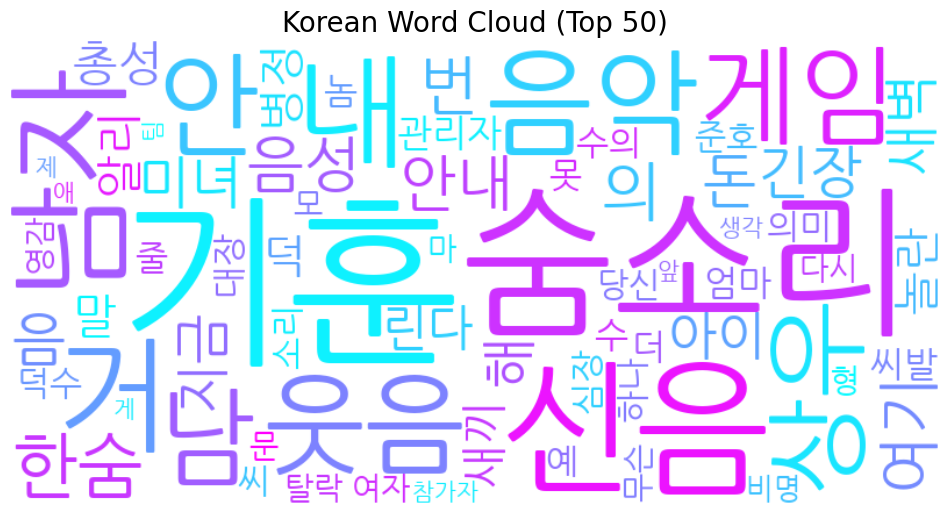

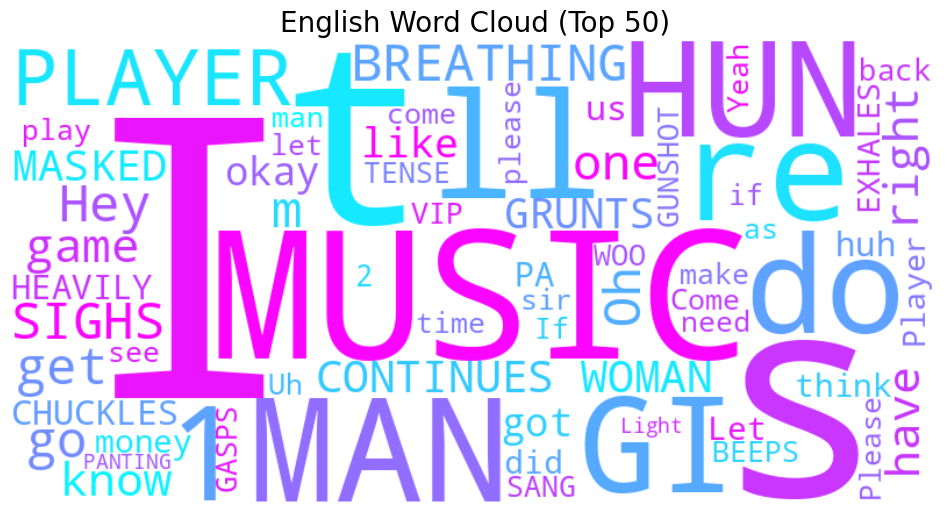

In [ ]:
import os
import re
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Folders containing all subtitle episodes
ko_folder = 'Squid Game Korean Subtitles'
en_folder = 'Squid Game English Subtitles'

# Function to clean subtitles (removes tags)
def clean_subtitles(lines):
    """ Cleans subtitles by removing tags, timestamps, and empty lines. """
    cleaned_lines = []

    for line in lines:
        line = line.strip()

        # Removing unwanted tags
        line = re.sub(r'{\\.*?}', '', line)        # Remove tags like {\an8}
        line = re.sub(r'</?i>', '', line)          # Remove italic tags
        line = re.sub(r'<.*?>', '', line)          # Remove HTML-like tags

        # Remove empty lines, timestamps, and standalone numbers
        if line and not re.match(r'^\d+$', line) and not re.match(r'^\d{2}:\d{2}:\d{2}', line):
            cleaned_lines.append(line)

    return cleaned_lines

# Function to extract and clean all text from all episodes
def extract_all_text(folder):
    """ Extracts and cleans all subtitle text from a folder. """
    all_text = []

    files = sorted([f for f in os.listdir(folder) if f.endswith('.txt')])

    for file in files:
        with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
            lines = clean_subtitles(f.readlines())
            all_text.extend(lines)

    return ' '.join(all_text)

# Extracting all Korean and English subtitle text
ko_text = extract_all_text(ko_folder)
en_text = extract_all_text(en_folder)

# Korean Tokenization (using Okt from konlpy)
okt = Okt()
ko_tokens = okt.nouns(ko_text)  # Extract nouns from Korean text
en_tokens = re.findall(r'\b\w+\b', en_text)  # Extract English words

# Extended Custom Stopwords

# Korean stopwords (extended)
ko_stopwords = {
    '이', '그', '저', '것', '있다', '없다', '하다', '되다', '이다', '사람', '시간', '우리', '좀', '저기', '왜',
    '나', '너', '거기', '아니', '그래', '응', '아니야', '네', '뭐', '어떻게', '정말', '그래서', '이제', '그냥',
    '했어', '했어요', '했지', '하자', '하세요', '했네', '할게', '하니까', '합니다', '한다', '하는', '하고',
    '했는데', '됐다', '됐어', '거야', '거든', '거죠'
}


# English stopwords (extended)
en_stopwords = {
    'a', 'an', 'the', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'of', 'to', 'in', 'and', 'or', 'for',
    'on', 'at', 'by', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'from', 'up', 'down', 'out', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just',
    'don', 'should', 'now', 'I', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'them', 'your',
    'yours', 'my', 'mine', 'our', 'ours', 'their', 'theirs', 'this', 'that', 'these', 'those', 'what', 'which',
    'who', 'whom','IST'
}


# Removing stopwords
ko_filtered = [word for word in ko_tokens if word not in ko_stopwords]
en_filtered = [word for word in en_tokens if word.lower() not in en_stopwords]

# Word Frequency Analysis (Top 50 Words)
ko_word_freq = Counter(ko_filtered).most_common(70)
en_word_freq = Counter(en_filtered).most_common(70)

# Display top 50 words
print("\n Top 50 Korean Words (After Removing Stopwords):")
for word, freq in ko_word_freq[:100]:
    print(f"{word}: {freq}")

print("\n Top 50 English Words (After Removing Stopwords):")
for word, freq in en_word_freq[:100]:
    print(f"{word}: {freq}")

def generate_wordcloud(word_freq, title, font_path=None):
    """ Generates and displays a word cloud for the top 50 words. """

    # Converting to dict for word cloud
    word_freq_dict = dict(word_freq)

    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        font_path=font_path,    # Korean font support
        colormap='cool',        # Color scheme
    ).generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Display Word Clouds
# Korean word cloud (specify a Korean font path)
korean_font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Adjust to your system's font
generate_wordcloud(ko_word_freq, "Korean Word Cloud (Top 50)", font_path=korean_font)

# English word cloud
generate_wordcloud(en_word_freq, "English Word Cloud (Top 50)")


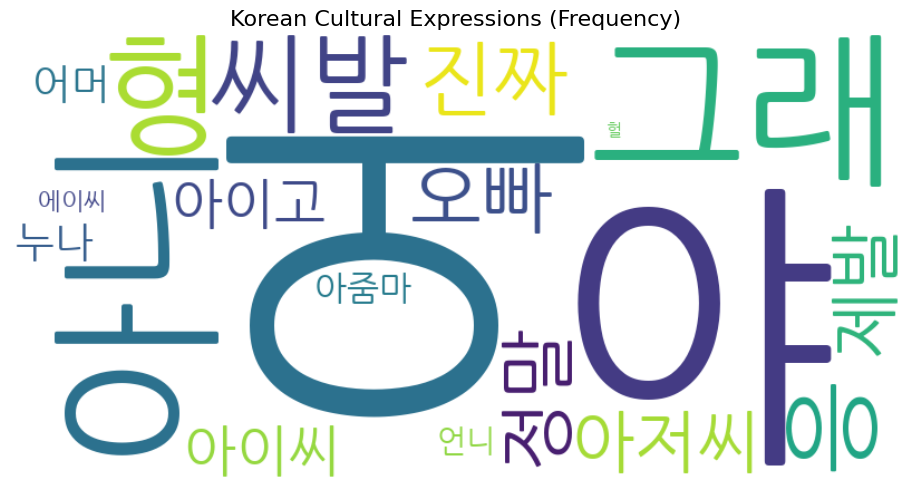

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = 'NanumGothic.ttf'

#Creating Korean cultral words word cloud
wc_korean = WordCloud(font_path=font_path, background_color='white', width=800, height=400)
wc_korean.generate_from_frequencies(keyword_frequency)

# Showing Korean word cloud
plt.figure(figsize=(10, 5))
plt.title("Korean Cultural Expressions (Frequency)", fontsize=16)
plt.imshow(wc_korean, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


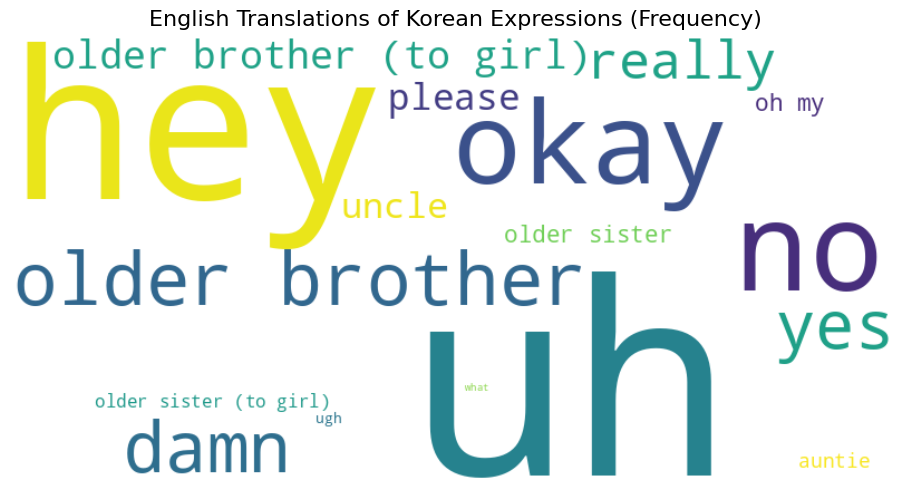

In [ ]:
translation_map = {
    "형": "older brother", "누나": "older sister", "오빠": "older brother (to girl)",
    "언니": "older sister (to girl)", "야": "hey", "씨발": "damn", "제발": "please",
    "아이고": "oh dear", "참나": "gosh", "에이씨": "ugh", "헐": "what", "진짜": "really",
    "아이씨": "ugh", "아줌마": "auntie", "아저씨": "uncle", "대박": "awesome",
    "어머": "oh my", "아이구": "oh dear", "아이고야": "oh no", "도대체": "on earth",
    "정말": "really", "그래": "okay", "응": "yes", "어": "uh", "아니": "no"
}

# Converting Korean frequency to English using your mapping
english_freq = {
    translation_map.get(k, k): v for k, v in keyword_frequency.items()
}

# Creating English word cloud
wc_english = WordCloud(background_color='white', width=800, height=400)
wc_english.generate_from_frequencies(english_freq)

# Show English word cloud
plt.figure(figsize=(10, 5))
plt.title("English Translations of Korean Expressions (Frequency)", fontsize=16)
plt.imshow(wc_english, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import os
import re

# Defining folders again
ko_folder = 'Squid Game Korean Subtitles'
en_folder = 'Squid Game English Subtitles'

# Loading files in sorted order
ko_files = sorted([f for f in os.listdir(ko_folder) if f.endswith('.txt')])
en_files = sorted([f for f in os.listdir(en_folder) if f.endswith('.txt')])

# Defining Korean cultural expressions or idioms to check
korean_expressions = ['고생 많았다', '정신 차려', '밥 먹었어?', '아이구', '에이씨', '어쩔 수 없다', '죽을래', '진짜', '씨발', '형']

# Function to clean and filter lines
def clean_and_filter(lines):
    clean_lines = []
    for line in lines:
        line = line.strip()
        line = re.sub(r'{\\.*?}', '', line)
        line = re.sub(r'</?i>', '', line)
        line = re.sub(r'<.*?>', '', line)
        if line and not re.match(r'^\d+$', line) and not re.match(r'^\d{2}:\d{2}:\d{2}', line):
            clean_lines.append(line)
    return clean_lines

# KWIC: Search and align expressions with their English translation
results = []

for ko_file, en_file in zip(ko_files, en_files):
    with open(os.path.join(ko_folder, ko_file), 'r', encoding='utf-8') as f_ko, \
         open(os.path.join(en_folder, en_file), 'r', encoding='utf-8') as f_en:

        ko_lines = clean_and_filter(f_ko.readlines())
        en_lines = clean_and_filter(f_en.readlines())

        # Sanity check to avoid mismatch
        min_len = min(len(ko_lines), len(en_lines))

        for i in range(min_len):
            for expr in korean_expressions:
                if expr in ko_lines[i]:
                    results.append({
                        'Korean Line': ko_lines[i],
                        'English Line': en_lines[i],
                        'Episode': ko_file
                    })

# Printing KWIC Results
print("\n KWIC Results for Korean Cultural Expressions:\n")
for res in results:
    print(f"[{res['Episode']}]")
    print(f"KR: {res['Korean Line']}")
    print(f"EN: {res['English Line']}\n")



 KWIC Results for Korean Cultural Expressions:

[ep1_ko.txt]
KR: (기훈) 아이씨, 씨발, 병신아, 알아!
EN: DAEHAN BANK

[ep1_ko.txt]
KR: 병신 새끼, 씨발, 알지도…
EN: Huh?

[ep1_ko.txt]
KR: 아! 나, 씨발
EN: I guess your mother finally abandoned you.

[ep1_ko.txt]
KR: 너 진짜 깜짝 놀라…
EN: -Yeah. Oh!

[ep1_ko.txt]
KR: (남자2) 아이, 진짜
EN: I guess you're still eating well.

[ep1_ko.txt]
KR: 야, 야, 진짜 같다, 야
EN: [KIDS YELL EXCITEDLY]

[ep1_ko.txt]
KR: 진짜 좋은 선물을 사 줄게
EN: Does that help you?

[ep1_ko.txt]
KR: 오늘 내 손에 진짜 죽어, 어?
EN: Ga-yeong, I swear.

[ep1_ko.txt]
KR: 내가 진짜로 내 힘으로 번 거거든요?
EN: [GI-HUN GRUNTS]

[ep1_ko.txt]
KR: 내 얼굴, 내 몸뚱어리로 진짜
EN: and your daughter is ten years old.

[ep1_ko.txt]
KR: 진짜 좋은 선물을 사 줄게
EN: -♪ I got thirsty ♪

[ep1_ko.txt]
KR: 니 진짜로
EN: Here, take this home, okay?

[ep1_ko.txt]
KR: (덕수) 씨발 년아!
EN: will have financial support,

[ep1_ko.txt]
KR: 와, 씨발, 존나 크다
EN: that you're a thug who preys on girls

[ep1_ko.txt]
KR: 형, 다음에 얘기해
EN: to this strange warehouse.

[ep1_ko.txt]
KR: (남자8) 아이, 씨발, 대가리 존나 크다
EN: Y

In [ ]:
from google.colab import files
import os
import shutil
import spacy
import re

# ========== Step 1: Upload English subtitle .txt files ==========
print("Please upload your English subtitle (.txt) files.")
uploaded_en = files.upload()

# ========== Step 2: Move uploaded files into a folder ==========
en_folder = 'Squid Game English Subtitles'
os.makedirs(en_folder, exist_ok=True)

for filename in uploaded_en.keys():
    shutil.move(filename, os.path.join(en_folder, filename))

print("English subtitle files uploaded and moved successfully.\n")

# ========== Step 3: Load spaCy English model ==========
nlp = spacy.load("en_core_web_sm")

# ========== Step 4: Read text from .txt files ==========
all_text = ""
for filename in os.listdir(en_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(en_folder, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip()
                # Skip lines with just numbers or timestamps
                if line and not line.isdigit() and not re.match(r'\d{2}:\d{2}:\d{2}', line):
                    if len(line.split()) > 3:  # keep only meaningful sentences
                        all_text += line + " "

# Optional: Preview a sample of the text
print(" Sample of subtitle text:\n")
print(all_text[:500], "\n...")

# ========== Step 5: Apply Named Entity Recognition ==========
doc = nlp(all_text)

print("\n Named Entities Found:\n")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

# ========== Step 6: Explain entity labels ==========
from spacy import explain
print("\n Entity Label Explanations:")
unique_labels = set(ent.label_ for ent in doc.ents)
for label in unique_labels:
    print(f"{label}: {explain(label)}")


📁 Please upload your English subtitle (.txt) files.


Saving ep1_en.txt to ep1_en.txt
Saving ep2_en.txt to ep2_en.txt
Saving ep3_en.txt to ep3_en.txt
Saving ep4_en.txt to ep4_en.txt
Saving ep5_en.txt to ep5_en.txt
Saving ep6_en.txt to ep6_en.txt
Saving ep7_en.txt to ep7_en.txt
Saving ep8_en.txt to ep8_en.txt
Saving ep9_en.txt to ep9_en.txt
✅ English subtitle files uploaded and moved successfully.

📄 Sample of subtitle text:

MASKED SUPERVISOR: What should we do? FRONT MAN: Begin the next game. Sir, let me help. [PLAYER #1 BREATHING HEAVILY] You look great, sir. ["THE BLUE DANUBE" PLAYING ON SPEAKERS] WOMAN: [ON PA] <i>Attention. The fourth game is about to begin.</i> <i>Please follow the staff's instructions</i> <i>and swiftly make your way towards the game hall.</i> <i>Let me repeat the instructions.</i> <i>The fourth game is about to begin.</i> <i>Please follow the staff's instructions</i> <i>and swiftly make your 
...

🧠 Named Entities Found:

fourth (ORDINAL)
fourth (ORDINAL)
WALTZ MUSIC ON SPEAKERS (ORG)
fourth (ORDINAL)
two (CARDINA

Stanza doesn't currently support Korean NER out of the box therefore i wasnt able to do it for the korean language.